In [1]:
import supervenn, pandas, matplotlib_venn

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# define annotations for later

In [3]:
annotation_file = '/Users/adrian/research/egilsstadir/results/deseq2/annotation.tsv'
annotation = pandas.read_csv(annotation_file, sep='\t')
annotation

,Unnamed: 0,ensembl_transcript_id,ensembl_gene_id,external_gene_name,gene_biotype,description
0,1,ENST00000387314,ENSG00000210049,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,2,ENST00000389680,ENSG00000211459,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,3,ENST00000387342,ENSG00000210077,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,4,ENST00000387347,ENSG00000210082,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,5,ENST00000386347,ENSG00000209082,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...,...,...,...
278215,278216,ENST00000441160,ENSG00000228437,LINC02474,lncRNA,long intergenic non-protein coding RNA 2474 [S...
278216,278217,ENST00000412098,ENSG00000229463,LYST-AS1,lncRNA,LYST antisense RNA 1 [Source:HGNC Symbol;Acc:H...
278217,278218,ENST00000438371,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...
278218,278219,ENST00000715678,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...


# super venn

In [4]:
input_dir = '/Users/adrian/research/egilsstadir/results/deseq2/'

df = pandas.read_csv(input_dir+'effect_KO_vs_WT.tsv', sep='\t', index_col=0)
a = set(df.index)
print(len(a))

df = pandas.read_csv(input_dir+'effect_202low_vs_WT.tsv', sep='\t', index_col=0)
b = set(df.index)
print(len(b))

df = pandas.read_csv(input_dir+'effect_202high_vs_WT.tsv', sep='\t', index_col=0)
c = set(df.index)
print(len(c))

df = pandas.read_csv(input_dir+'effect_202high_vs_202low.tsv', sep='\t', index_col=0)
d = set(df.index)
print(len(d))

834
1465
2129
1469


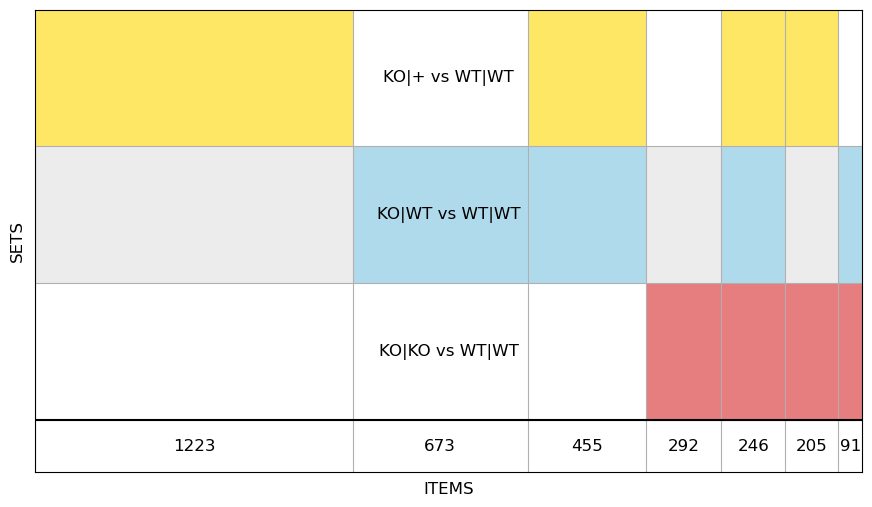

In [5]:
sets = [a, b, c]
labels = ['KO|KO vs WT|WT', 'KO|WT vs WT|WT', 'KO|+ vs WT|WT']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['tab:red', 'skyblue', 'gold', 'tab:green'])

matplotlib.pyplot.show()

In [6]:
# explore what happened with the effect of loosing 201: WT vs KO|* minus WT vs KO|KO
sub = mso.chunks[frozenset([1, 2])]
print(len(sub))

for ensembl in list(sub):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    print('{}\t{}\t{}'.format(ensembl, symbol, description))

455
ENSG00000179674	ARL14	ADP ribosylation factor like GTPase 14
ENSG00000229544	NKX1-2	NK1 homeobox 2
ENSG00000111799	COL12A1	collagen type XII alpha 1 chain
ENSG00000154040	CABYR	calcium binding tyrosine phosphorylation regulated
ENSG00000001626	CFTR	CF transmembrane conductance regulator
ENSG00000117477	CCDC181	coiled-coil domain containing 181
ENSG00000137642	SORL1	sortilin related receptor 1
ENSG00000169031	COL4A3	collagen type IV alpha 3 chain
ENSG00000267121	FMNL1-DT	FMNL1 divergent transcript
ENSG00000198203	SULT1C2	sulfotransferase family 1C member 2
ENSG00000196353	CPNE4	copine 4
ENSG00000168447	SCNN1B	sodium channel epithelial 1 subunit beta
ENSG00000248643	RBM14-RBM4	RBM14-RBM4 readthrough
ENSG00000137364	TPMT	thiopurine S-methyltransferase
ENSG00000187486	KCNJ11	potassium inwardly rectifying channel subfamily J member 11
ENSG00000266469	nan	novel transcript, antisense to MED1 & FBXL20
ENSG00000233215	LINC01687	long intergenic non-protein coding RNA 1687
ENSG00000185518	SV2

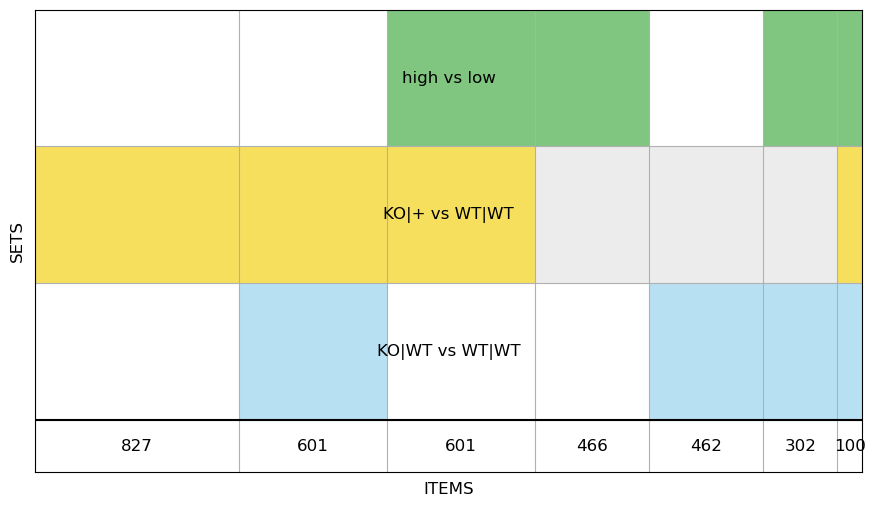

In [7]:
sets = [b, c, d]
labels = ['KO|WT vs WT|WT', 'KO|+ vs WT|WT', 'high vs low']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['skyblue', 'gold', 'tab:green'])

matplotlib.pyplot.show()

In [8]:
# explore what happened with the effect of high levels of 202 in the 201 KO background: uniques high vs low compared to KO|* vs WT|WT
sub = mso.chunks[frozenset([2])]
print(len(sub))

for ensembl in list(sub):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    print('{}\t{}\t{}'.format(ensembl, symbol, description))

466
ENSG00000138400	MDH1B	malate dehydrogenase 1B
ENSG00000286324	nan	novel transcript
ENSG00000101342	TLDC2	TBC/LysM-associated domain containing 2
ENSG00000253598	SLC10A5	solute carrier family 10 member 5
ENSG00000175764	TTLL11	tubulin tyrosine ligase like 11
ENSG00000175591	P2RY2	purinergic receptor P2Y2
ENSG00000075673	ATP12A	ATPase H+/K+ transporting non-gastric alpha2 subunit
ENSG00000213123	DYNLT2B	dynein light chain Tctex-type 2B
ENSG00000101188	NTSR1	neurotensin receptor 1
ENSG00000117569	PTBP2	polypyrimidine tract binding protein 2
ENSG00000134531	EMP1	epithelial membrane protein 1
ENSG00000108669	CYTH1	cytohesin 1
ENSG00000165046	LETM2	leucine zipper and EF-hand containing transmembrane protein 2
ENSG00000171811	CFAP46	cilia and flagella associated protein 46
ENSG00000106511	MEOX2	mesenchyme homeobox 2
ENSG00000273599	nan	novel transcript, antisense to CTBP2
ENSG00000144451	SPAG16	sperm associated antigen 16
ENSG00000121716	PILRB	paired immunoglobin like type 2 receptor beta